## DSC-510 Multivariate Analysis Assignment Guide

### Overview 
In this assignment, you will explore various aspects of multivariate analysis, which allows for the simultaneous examination of data with multiple variables. You will analyze different types of multivariate distributions, calculate mean vectors, perform variance/covariance testing, and interpret the results. This will involve working with Python and Jupyter Notebooks to handle real-world datasets and understand the intricate relationships and patterns that multivariate analysis can reveal.

**Instructions**: 

1. Complete each part of the assignment in this notebook.
2. Ensure you document your code and provide explanations for your findings.
3. When analysis or discussion are required, add your text to the existing markdown cells
4. Where code is required, type and run it in the code cells provided.
5. Add markdown and code cells if needed.


## Part 1: Analyzing Different Types of Multivariate Distributions

**Introduction to Multivariate Distribution**
1.	Provide a brief explanation of multivariate distribution and its significance.

A multivariate distribution is a probability distribution that describes the probabilties of multiple random variables simultaneously. It considers the joint behavior of two or more random variables versus a single random variable. Its significance comes from the ability to capture relationships and dependencies of real-world phenomena that often involves multiple interacting variables.



**Types of Multivariate Distributions**

2.	Describe the various types of multivariate distributions, including the multivariate normal distribution, multivariate t-distribution, and others.

The multivariate normal is completely characterized by its mean vector and its covariance matrix. It is often considered the cornerstone of multivariate distributions because of its mathematical tractability and the Central Limit Theorem, and is also refered to as the Gaussian distribution. (Park, S & Lim, J, 2022) The MVN is a generalization of the one-dimensional normal distribution to higher dimensions. 

The multivariate t-distribution is a generalization of Student's t-distribution to multiple dimensions. It is used as a more robust alternative to the MVN when dealing with data that has heavier tails or outliers. This means it gives a higher probability to more extreme values. It is useful in financial modeling, robut statistical inference, and situations where the underlying data may not perfectly adhere to normality assumptions. 

Other types of multivariate distributions for specific data:

The multivariate log-normal distribution is a continous probability distribution of a random vector whose components are all positive. It's a generalization of the univariate log-normal to multiple variables. The key idea is if you take the natural logarithm of each component of a multivariate log-normally distributed random vector, the resulting vector will follow a multivariate normal distribution.

The multinomial distribution is an extension of the binomial distribution where each trial can have more than two possible outcomes. It describes the probabilities of the counts of various outcomes when an experiment with a fixed nmber of independent trials is performed.

Wishart and Inverse Wishart Distribution: This is a multivariate generalization of the chi-sqaured distribution. It's a distribution of symmetric, postive-definite matrices that arises as the distribution of the sample covariance matrix for samples drawn from a multivariate normal distribution. The inverse distibution uses the inverse matrices as the name suggests. They are both used in Bayesian statistics, particularly for esatimating covariance matrices of multivariate normal distributions.  

This is not an exhaustive list of multivariate distributions as choosing the correct distribution to use depends on the nature of the data, the underlying assumptions about the data-generating process, and the specific research questions being addressed. 



**Visualizing Multivariate Distributions**

3.	Use Python libraries like numpy, scipy, and matplotlib to visualize different multivariate distributions.


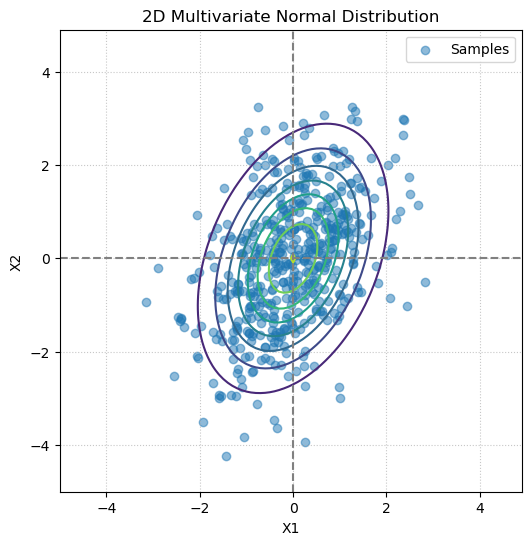

'\nThe scatter plot shows the generated samples, and the contour plot visualizes the PDF, with lines connecting points of equal probability density. \nThe elliptical shape of the contours is characteristic of the multivariate normal distribution, and its orientation is determined by the covariance matrix.\n'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the mean vector and covariance matrix
mean = [0, 0]
cov = [[1, 0.5], [0.5, 2]]  # Diagonal terms are variances, off-diagonal is covariance

num_samples = 500
samples = multivariate_normal.rvs(mean=mean, cov=cov, size=num_samples)
# The line above generates random samples from this distribution.

# Create a grid for plotting the probability density function (PDF)
x, y = np.mgrid[-5:5:.1, -5:5:.1]
pos = np.dstack((x, y))
rv = multivariate_normal(mean, cov)

# Plot the samples and the PDF contours
plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, label='Samples') # Creates 2D Grid  
plt.contour(x, y, rv.pdf(pos), levels=10, cmap='viridis')  # Calculate the probability density function over this grid
plt.title('2D Multivariate Normal Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axvline(0, color='gray', linestyle='--')
plt.axhline(0, color='gray', linestyle='--')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

"""
The scatter plot shows the generated samples, and the contour plot visualizes the PDF, with lines connecting points of equal probability density. 
The elliptical shape of the contours is characteristic of the multivariate normal distribution, and its orientation is determined by the covariance matrix.
"""

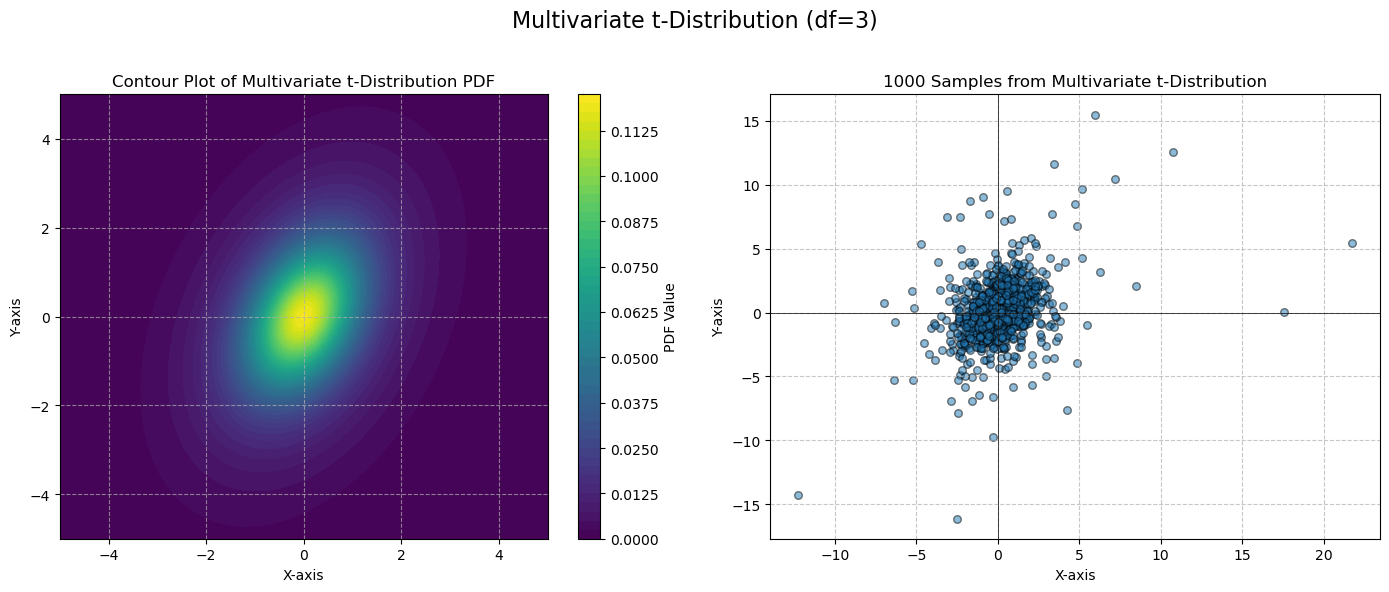

'\nThe plots show the characteristic elliptical contours of the multivariate t-distribution and the spread of the sampled points, which will be more dispersed\n(especially in the tails) compared to MVN with the same mean and covariance structure, particularly for small degrees of freedom. \nThe heavier tails are evident in the scatter plot where more points lie further from the center. \n'

In [4]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Define the parameters for the 2D multivariate t-distribution
mean = np.array([0, 0])  # Mean vector
shape_matrix = np.array([[1, 0.5],
                         [0.5, 2]])  # Shape matrix (analogous to covariance)
df = 3  # Degrees of freedom

# Create a multivariate t-distribution object
mvt = scipy.stats.multivariate_t(loc=mean, shape=shape_matrix, df=df)

# Generate random samples from the distribution
num_samples = 1000
samples = mvt.rvs(size=num_samples) # Generates random variates from the distribution

# Create a grid of points for the contour plot
x = np.linspace(-5, 5, 500)
y = np.linspace(-5, 5, 500)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Calculate the PDF at each point on the grid
pdf_values = mvt.pdf(pos)

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Contour plot of the PDF
contour = axes[0].contourf(X, Y, pdf_values, cmap='viridis', levels=50) # Creates a filled countour plot, visualizing the density of the distribution.
# Higher PDF values indicate regions where data points are more likely to occur
axes[0].set_title('Contour Plot of Multivariate t-Distribution PDF')
axes[0].set_xlabel('X-axis')
axes[0].set_ylabel('Y-axis')
fig.colorbar(contour, ax=axes[0], label='PDF Value')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Scatter plot of the generated samples
axes[1].scatter(samples[:, 0], samples[:, 1], alpha=0.5, edgecolor='k', s=30) 
# The line above plots the indivdual random saamples generated earlier.
# This gives a more direct sense of the distribution's spread and tail behavior. 
axes[1].set_title(f'{num_samples} Samples from Multivariate t-Distribution')
axes[1].set_xlabel('X-axis')
axes[1].set_ylabel('Y-axis')
axes[1].axhline(0, color='black', linewidth=0.5)
axes[1].axvline(0, color='black', linewidth=0.5)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.suptitle(f'Multivariate t-Distribution (df={df})', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make space for suptitle
plt.show()

"""
The plots show the characteristic elliptical contours of the multivariate t-distribution and the spread of the sampled points, which will be more dispersed
(especially in the tails) compared to MVN with the same mean and covariance structure, particularly for small degrees of freedom. 
The heavier tails are evident in the scatter plot where more points lie further from the center. 
"""

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the multinomial distribution
n_trials = 100  # Total number of trials (e.g., rolling a die 100 times)
probabilities = [0.2, 0.3, 0.5]  # Probabilities of each of the 3 categories
                                # (must sum to 1)
categories = ['Category A', 'Category B', 'Category C']

# Perform a single multinomial experiment
# This gives the number of times each category occurred
single_outcome = np.random.multinomial(n_trials, probabilities)

# Plotting the result of the single outcome
plt.figure(figsize=(8, 6))
plt.bar(categories, single_outcome, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.title(f"Single Multinomial Experiment Outcome (n={n_trials})")
plt.show()

print(f"Outcome: {categories[0]}={single_outcome[0]}, {categories[1]}={single_outcome[1]}, {categories[2]}={single_outcome[2]}")

""" 
The code defines n_trials and the probabilities for three distinct categories. np.random.multinomial then simulates this single outcome experiment, and matplotlib
plots the resulting frequencies for each catergory in a bar chart. We can also visualize mutiple outcomes (2D scatterplot for 3 categories, or 3D barchart )
"""

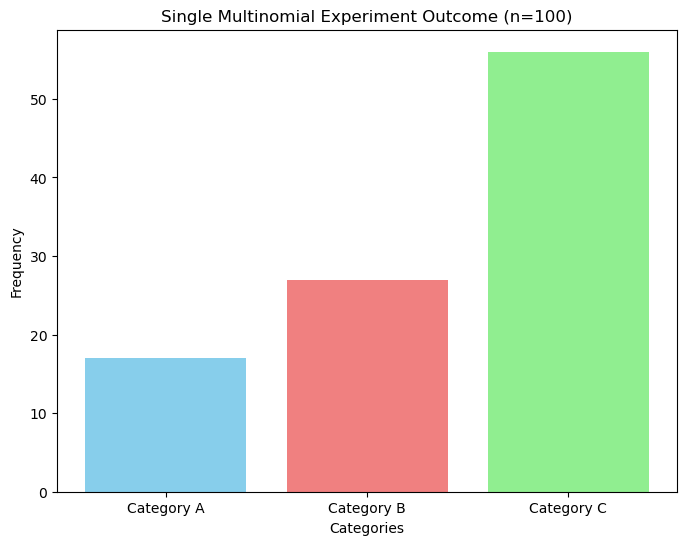

Outcome: Category A=17, Category B=27, Category C=56


'\nThe code defines n_trials and the probabilities for three distinct categories. np.random.multinomial then simulates this single outcome experiment, and matplotlib\nplots the resulting frequencies for each catergory in a bar chart. We can also visualize mutiple outcomes (2D scatterplot for 3 categories, or 3D barchart)\n'

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the multinomial distribution
n_trials = 100  # Total number of trials (e.g., rolling a die 100 times)
probabilities = [0.2, 0.3, 0.5]  # Probabilities of each of the 3 categories
                                # (must sum to 1)
categories = ['Category A', 'Category B', 'Category C']

# Perform a single mult inomial experiment
# This gives the number of times each category occurred
single_outcome = np.random.multinomial(n_trials, probabilities)

# Plotting the result of the single outcome
plt.figure(figsize=(8, 6))
plt.bar(categories, single_outcome, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.title(f"Single Multinomial Experiment Outcome (n={n_trials})")
plt.show()

print(f"Outcome: {categories[0]}={single_outcome[0]}, {categories[1]}={single_outcome[1]}, {categories[2]}={single_outcome[2]}")

"""
The code defines n_trials and the probabilities for three distinct categories. np.random.multinomial then simulates this single outcome experiment, and matplotlib
plots the resulting frequencies for each catergory in a bar chart. We can also visualize mutiple outcomes (2D scatterplot for 3 categories, or 3D barchart)
"""

4.	Generate synthetic datasets for each type of distribution and create scatter plots and pair plots using seaborn.

First 5 rows of the generated dataset:
         X1        X2        X3
0 -0.360916  0.752621  2.335671
1  0.580821  1.346713  1.269410
2  0.305699  0.957879  3.596342
3 -0.167198  0.753488  2.016226
4 -0.524295 -0.554590  3.113893


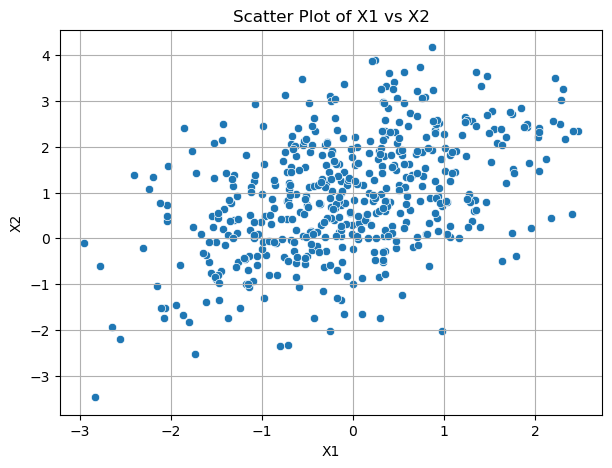

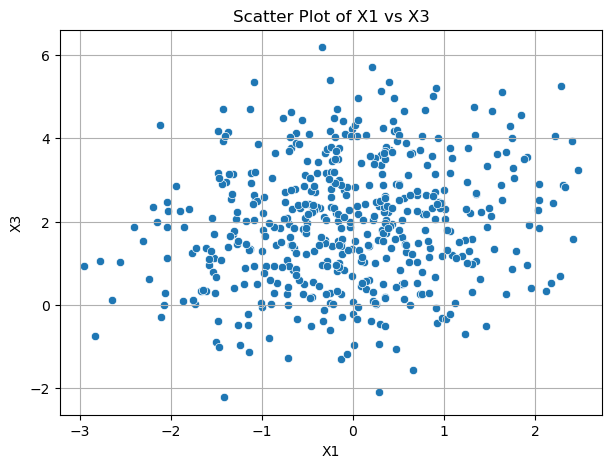

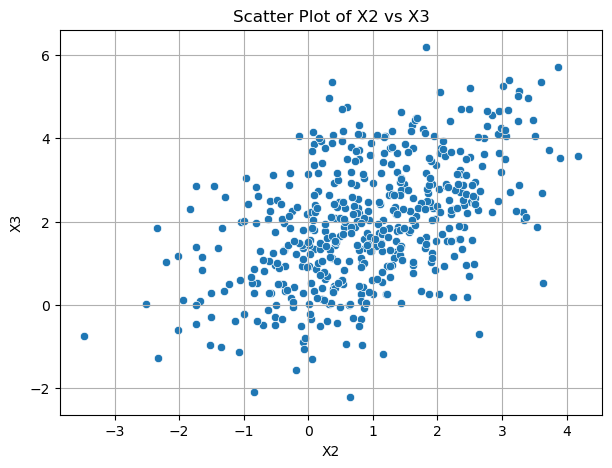

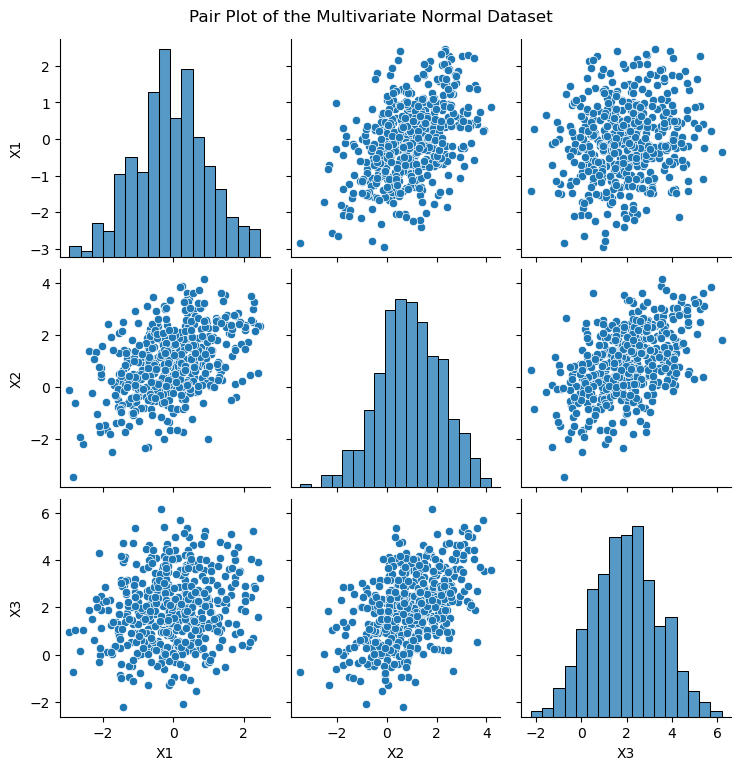

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 3D dataset for multivariate normal distribution
mean = np.array([0, 1, 2])
cov_matrix = np.array([
    [1.0, 0.5, 0.2],
    [0.5, 1.5, 0.8],
    [0.2, 0.8, 2.0]
])

# Generate the synthetic data (500 points)
num_samples = 500
data = np.random.multivariate_normal(mean, cov_matrix, num_samples)

# Create a Pandas DataFrame for easier handling with seaborn
column_names = ['X1', 'X2', 'X3']
df = pd.DataFrame(data, columns=column_names)

print("First 5 rows of the generated dataset:")
print(df.head())

# Scatter plot between X1 and X2
plt.figure(figsize=(7, 5))
sns.scatterplot(x='X1', y='X2', data=df)
plt.title('Scatter Plot of X1 vs X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

# Scatter plot between X1 and X3
plt.figure(figsize=(7, 5))
sns.scatterplot(x='X1', y='X3', data=df)
plt.title('Scatter Plot of X1 vs X3')
plt.xlabel('X1')
plt.ylabel('X3')
plt.grid(True)
plt.show()

# Scatter plot between X2 and X3
plt.figure(figsize=(7, 5))
sns.scatterplot(x='X2', y='X3', data=df)
plt.title('Scatter Plot of X2 vs X3')
plt.xlabel('X2')
plt.ylabel('X3')
plt.grid(True)
plt.show()


# Pairplot (scatter plot matrix) 
sns.pairplot(df, diag_kind='hist')
plt.suptitle('Pair Plot of the Multivariate Normal Dataset', y=1.02) # y=1.02 raises title a bit
plt.show()

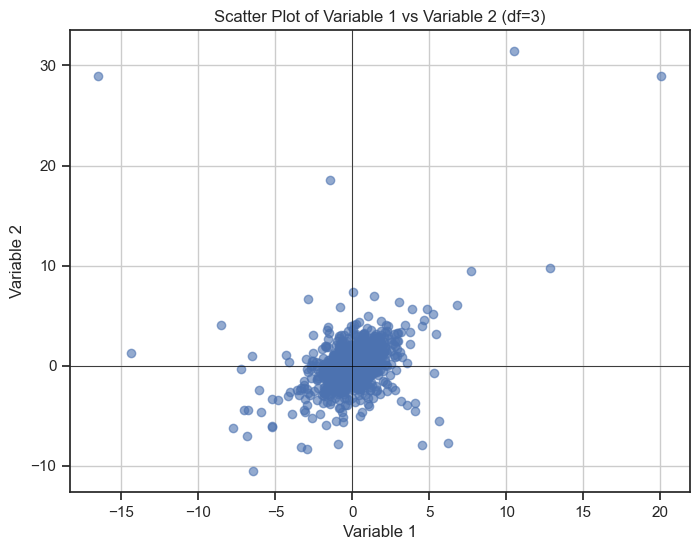

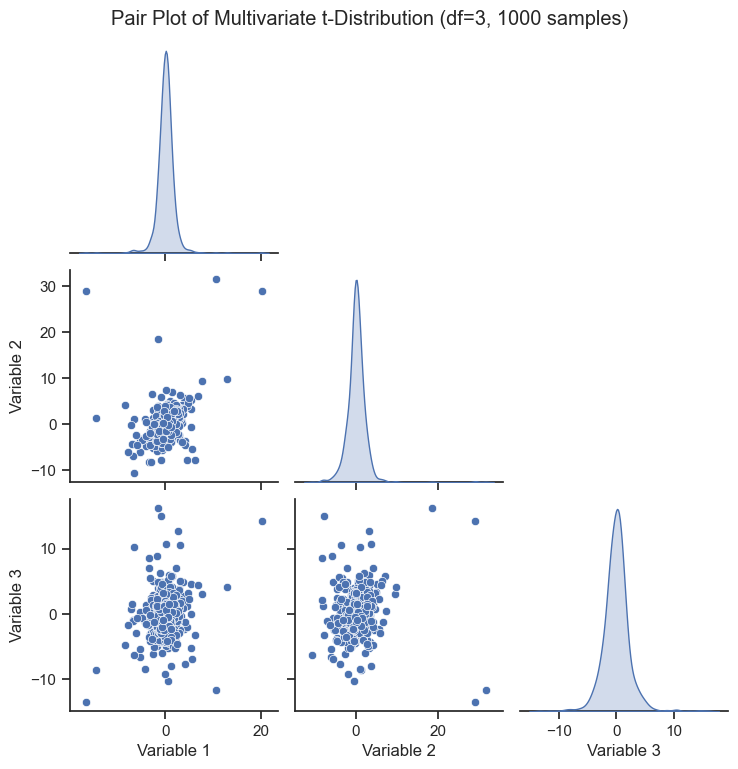

First 5 samples from the multivariate t-distribution:
   Variable 1  Variable 2  Variable 3
0    1.340140    0.761063    2.608426
1   -0.117542    0.799681   -0.346583
2    0.548924   -0.412283   -2.156765
3    1.291185    0.337178    0.526163
4   -0.241405   -0.024597   -0.235035


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dimensionality of the distribution
dim = 3

# Mean vector (location parameter)
mean = np.array([0, 0, 0])

# Shape matrix (must be positive semi-definite)
# For simplicity, let's use a diagonal matrix, implying uncorrelated variables
# before the t-distribution transformation.
shape_matrix = np.array([
    [1.0, 0.5, 0.2],
    [0.5, 1.5, 0.3],
    [0.2, 0.3, 2.0]
])

# Degrees of freedom (df > 0)
# Smaller df leads to heavier tails (more outliers)
df = 3

# Number of samples to generate
num_samples = 1000


# Generate multivariate normal random variables
# These will be scaled to get t-distributed variables
mvn_samples = np.random.multivariate_normal(np.zeros(dim), shape_matrix, num_samples)

# Generate chi-squared random variables (for the denominator of the t-distribution)
chi2_samples = np.random.chisquare(df, num_samples)

# Compute the multivariate t-distributed samples
# Each component x_i = mu_i + z_i * sqrt(df / chi2)
# where z_i are components of the multivariate normal
multivariate_t_samples = mean + mvn_samples * np.sqrt(df / chi2_samples)[:, np.newaxis]

# Convert to a Pandas DataFrame for easier plotting with Seaborn
column_names = [f'Variable {i+1}' for i in range(dim)]
df_t_samples = pd.DataFrame(multivariate_t_samples, columns=column_names)

plt.figure(figsize=(8, 6))
plt.scatter(df_t_samples['Variable 1'], df_t_samples['Variable 2'], alpha=0.6)
plt.title(f'Scatter Plot of Variable 1 vs Variable 2 (df={df})')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.grid(True)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.show()

# This will show scatter plots for all pairs of variables and histograms on the diagonal using seaborn module
sns.set_theme(style="ticks")
pair_plot_fig = sns.pairplot(df_t_samples, diag_kind='kde', corner=True) # Use corner=True for non-redundant plot
pair_plot_fig.fig.suptitle(f'Pair Plot of Multivariate t-Distribution (df={df}, {num_samples} samples)', y=1.02) # Adjust title position
plt.show()

# Display the first few rows of the generated data
print("First 5 samples from the multivariate t-distribution:")
print(df_t_samples.head())

--- Dataset 1: Fair 4-Sided Die ---
   CategoryA  CategoryB  CategoryC  CategoryD   Experiment_Type
0         16         13         20         11  Fair_4_Sided_Die
1         10         10         18         22  Fair_4_Sided_Die
2         15         17         14         14  Fair_4_Sided_Die
3         14         16         15         15  Fair_4_Sided_Die
4         15          7         20         18  Fair_4_Sided_Die

Shape: (300, 5)
        CategoryA   CategoryB   CategoryC   CategoryD
count  300.000000  300.000000  300.000000  300.000000
mean    14.943333   15.230000   14.766667   15.060000
std      3.164412    3.378631    3.347073    3.478996
min      8.000000    7.000000    6.000000    7.000000
25%     13.000000   13.000000   12.000000   13.000000
50%     15.000000   15.000000   15.000000   15.000000
75%     17.000000   18.000000   17.000000   17.000000
max     27.000000   25.000000   28.000000   25.000000

Sum of outcomes per experiment (should be close to n1=60):
0    60
1    60
2

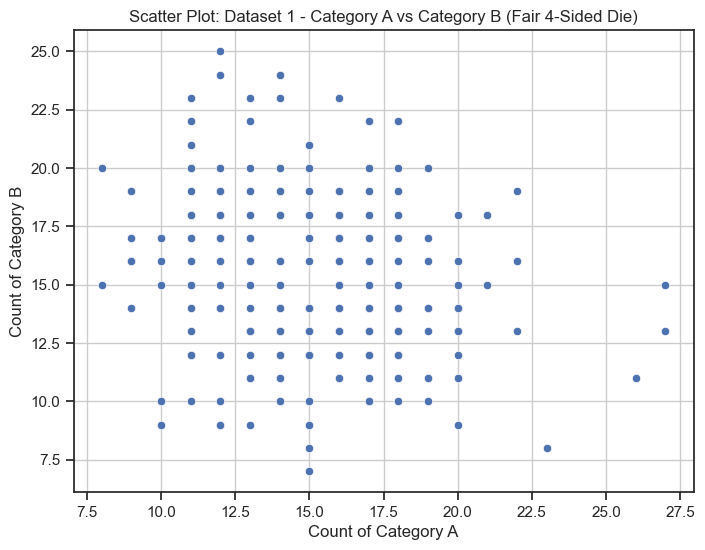

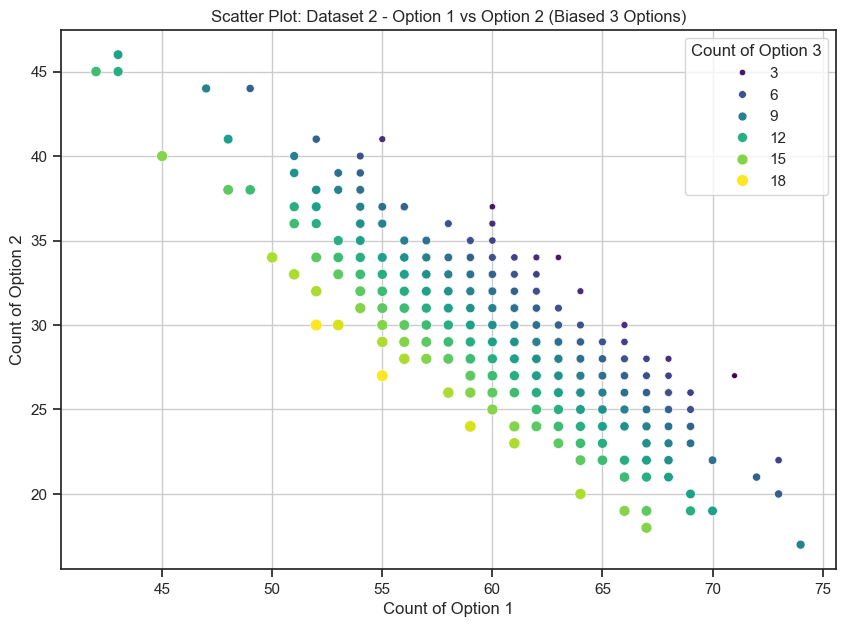

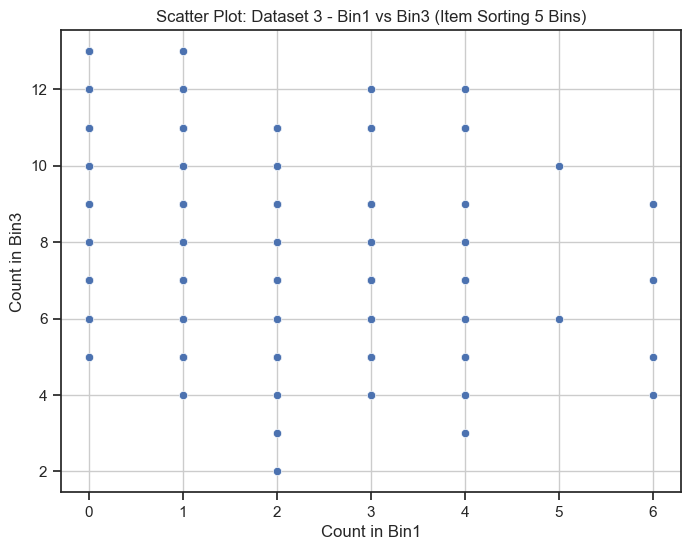

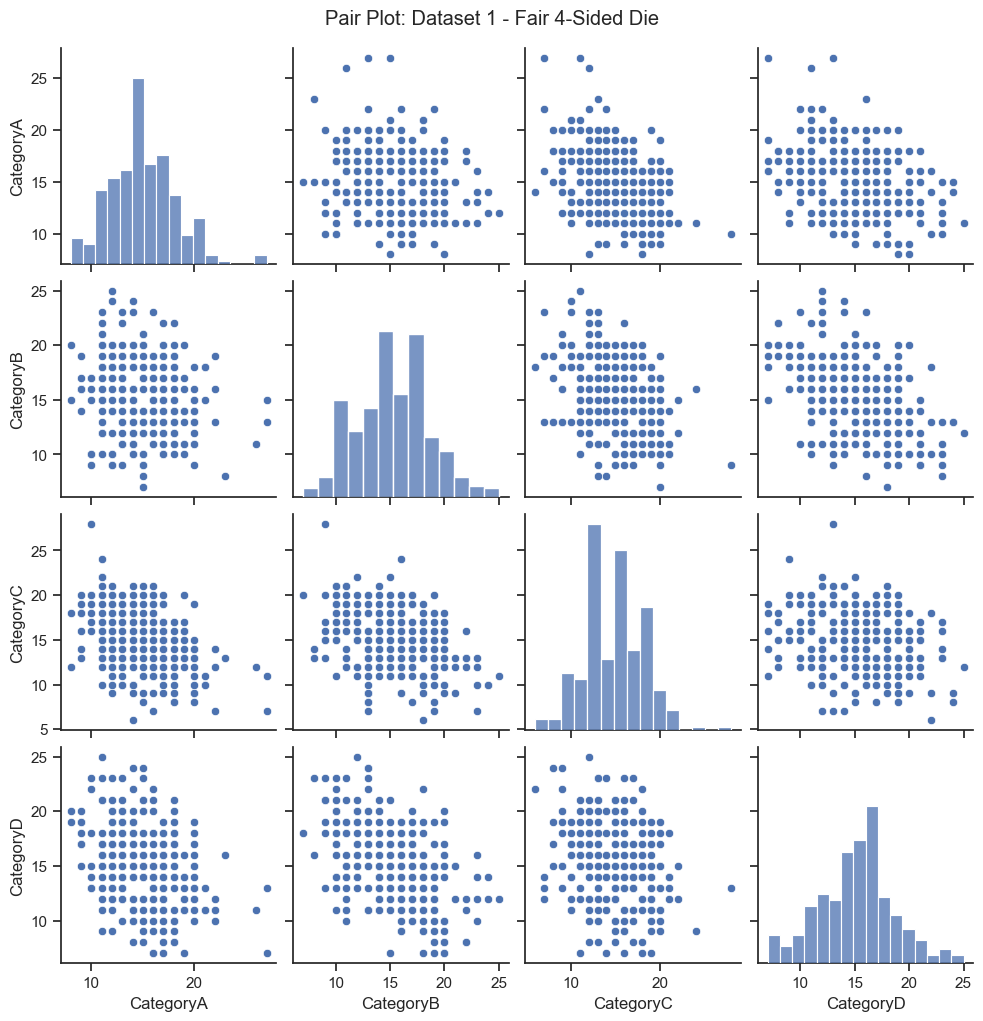

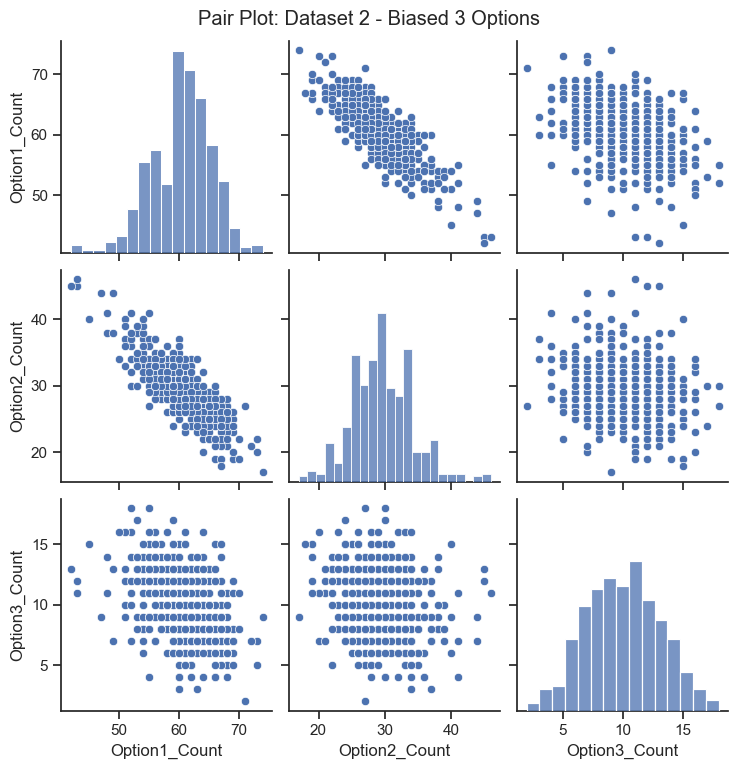

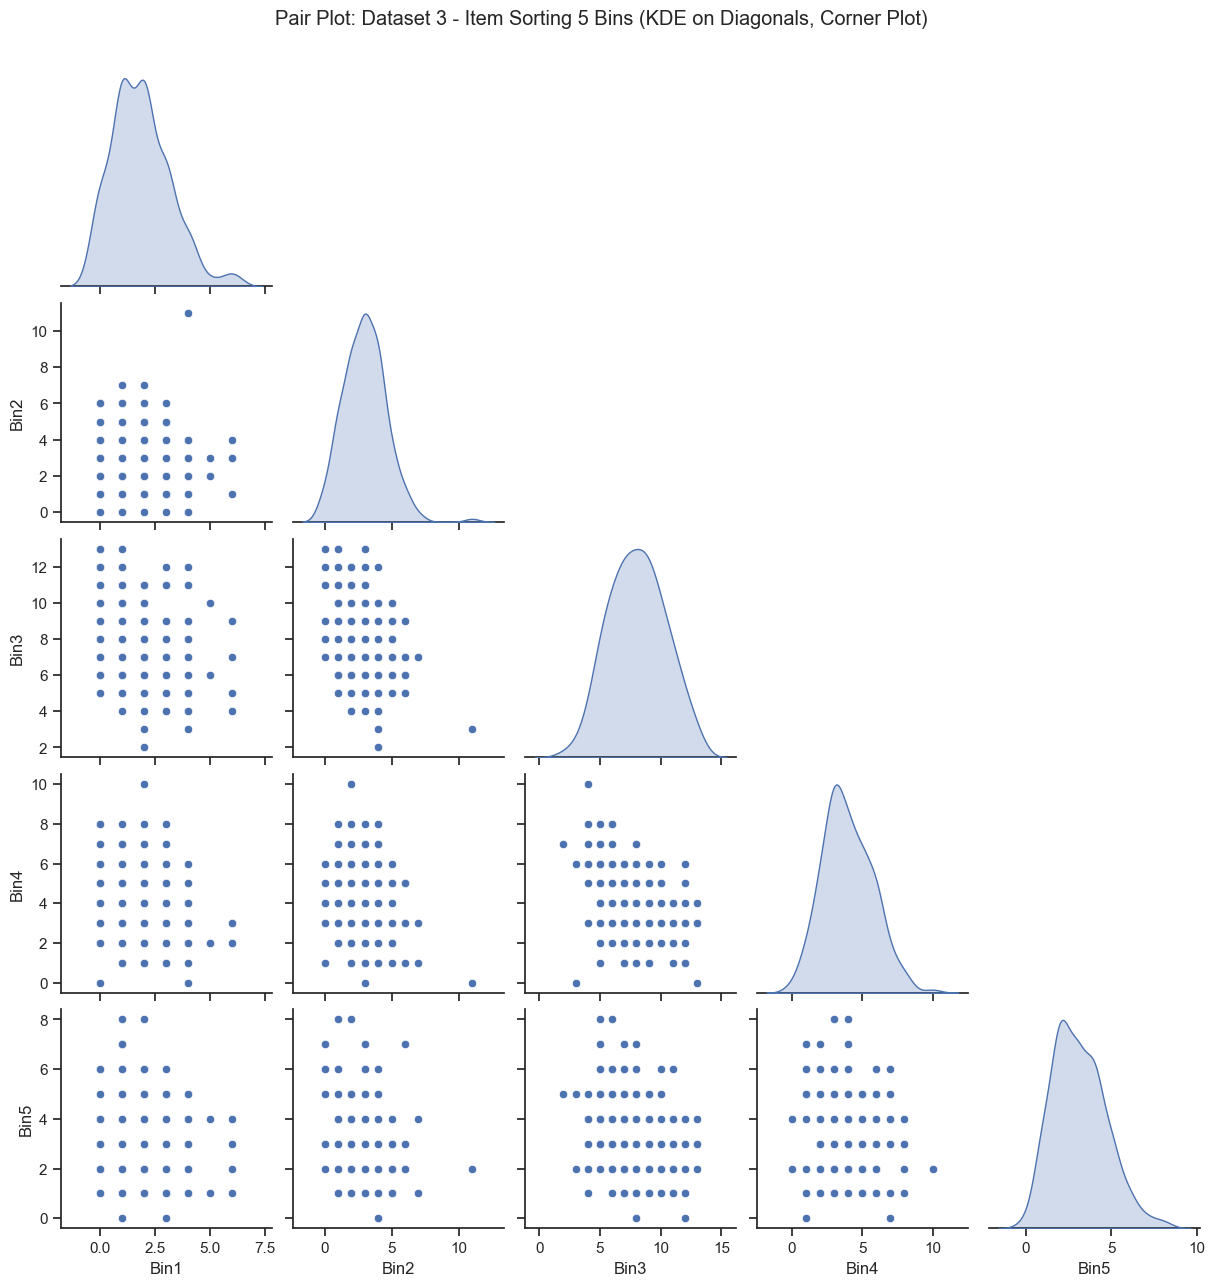

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Part 1: Generate Synthetic Datasets from Multinomial Distribution ---

# Define parameters for the distributions
# n: number of trials (e.g., number of times a k-sided die is rolled)
# pvals: list of probabilities for each of the k outcomes. Must sum to 1.
# size: number of experiments (i.e., number of rows in our dataset)

# Dataset 1: Simulating a 4-sided die
n1 = 60  # 60 rolls per experiment
pvals1 = [0.25, 0.25, 0.25, 0.25]  # Fair 4-sided die
num_experiments1 = 300
data1 = np.random.multinomial(n=n1, pvals=pvals1, size=num_experiments1)
df1 = pd.DataFrame(data1, columns=['CategoryA', 'CategoryB', 'CategoryC', 'CategoryD'])
df1['Experiment_Type'] = 'Fair_4_Sided_Die'

# Dataset 2: Simulating choices from 3 options with different probabilities
n2 = 100  # 100 choices per subject
pvals2 = [0.6, 0.3, 0.1]  # Biased choices (e.g., 60% prefer option 1, 30% option 2, 10% option 3)
num_experiments2 = 400
data2 = np.random.multinomial(n=n2, pvals=pvals2, size=num_experiments2)
df2 = pd.DataFrame(data2, columns=['Option1_Count', 'Option2_Count', 'Option3_Count'])
df2['Experiment_Type'] = 'Biased_3_Options'

# Dataset 3: Simulating a scenario with more categories and fewer trials per experiment
n3 = 20 # 20 items sorted into 5 bins
pvals3 = [0.1, 0.15, 0.4, 0.2, 0.15] # Probabilities for 5 bins
num_experiments3 = 200
data3 = np.random.multinomial(n=n3, pvals=pvals3, size=num_experiments3)
df3 = pd.DataFrame(data3, columns=['Bin1', 'Bin2', 'Bin3', 'Bin4', 'Bin5'])
df3['Experiment_Type'] = 'Item_Sorting_5_Bins'


# --- Display sample data and info ---
print("--- Dataset 1: Fair 4-Sided Die ---")
print(df1.head())
print(f"\nShape: {df1.shape}")
print(df1.describe())
print("\nSum of outcomes per experiment (should be close to n1=" + str(n1) + "):")
print(df1[['CategoryA', 'CategoryB', 'CategoryC', 'CategoryD']].sum(axis=1).head())

print("\n\n--- Dataset 2: Biased 3 Options ---")
print(df2.head())
print(f"\nShape: {df2.shape}")
print(df2.describe())
print("\nSum of outcomes per experiment (should be close to n2=" + str(n2) + "):")
print(df2[['Option1_Count', 'Option2_Count', 'Option3_Count']].sum(axis=1).head())

print("\n\n--- Dataset 3: Item Sorting 5 Bins ---")
print(df3.head())
print(f"\nShape: {df3.shape}")
print(df3.describe())
print("\nSum of outcomes per experiment (should be close to n3=" + str(n3) + "):")
print(df3[['Bin1', 'Bin2', 'Bin3', 'Bin4', 'Bin5']].sum(axis=1).head())


# --- Part 2: Create Scatter Plots using Seaborn ---

# Scatter plot for Dataset 1: CategoryA vs CategoryB
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='CategoryA', y='CategoryB')
plt.title('Scatter Plot: Dataset 1 - Category A vs Category B (Fair 4-Sided Die)')
plt.xlabel('Count of Category A')
plt.ylabel('Count of Category B')
plt.grid(True)
plt.show()

# Scatter plot for Dataset 2: Option1_Count vs Option2_Count, colored by Option3_Count
plt.figure(figsize=(10, 7))
scatter_plot2 = sns.scatterplot(data=df2, x='Option1_Count', y='Option2_Count', hue='Option3_Count', palette='viridis', size='Option3_Count')
plt.title('Scatter Plot: Dataset 2 - Option 1 vs Option 2 (Biased 3 Options)')
plt.xlabel('Count of Option 1')
plt.ylabel('Count of Option 2')
plt.legend(title='Count of Option 3')
plt.grid(True)
plt.show()

# Scatter plot for Dataset 3: Bin1 vs Bin3
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df3, x='Bin1', y='Bin3')
plt.title('Scatter Plot: Dataset 3 - Bin1 vs Bin3 (Item Sorting 5 Bins)')
plt.xlabel('Count in Bin1')
plt.ylabel('Count in Bin3')
plt.grid(True)
plt.show()


# --- Part 3: Create Pair Plots using Seaborn ---

# Pair plot for Dataset 1
# Selecting only the numerical columns for the pair plot
pair_plot1 = sns.pairplot(df1[['CategoryA', 'CategoryB', 'CategoryC', 'CategoryD']])
pair_plot1.fig.suptitle('Pair Plot: Dataset 1 - Fair 4-Sided Die', y=1.02) # y=1.02 raises title a bit
plt.show()

# Pair plot for Dataset 2
pair_plot2 = sns.pairplot(df2[['Option1_Count', 'Option2_Count', 'Option3_Count']])
pair_plot2.fig.suptitle('Pair Plot: Dataset 2 - Biased 3 Options', y=1.02)
plt.show()

# Pair plot for Dataset 3
# Adding a hue for demonstration, though for multinomial the 'Experiment_Type' is constant per df
# If we combined dataframes, hue would be more meaningful. Here, it's just to show the option.
# For a single multinomial dataset, hue on one of its own count variables can be insightful.
pair_plot3 = sns.pairplot(df3[['Bin1', 'Bin2', 'Bin3', 'Bin4', 'Bin5']], diag_kind='kde', corner=True)
pair_plot3.fig.suptitle('Pair Plot: Dataset 3 - Item Sorting 5 Bins (KDE on Diagonals, Corner Plot)', y=1.03)
plt.show()



**Analysis**

6.	Compare the visualizations and discuss the key characteristics of each distribution type.
  
  Characteristics of each type of visualization displayed above:
  
The multivariate normal distribution (MVN) has parameters of the mean vector and covariance matrix. It's Bell-shaped in multiple dimensions and is thus symmetric around its mean vector. The contours of equal probability density are ellipsoids. All marginal distributions (distributions of subsets of the variables) are normal. All conditional distributions (distribution of some variables given the value of others) are also normal. Any linear combinations of the variables in a multivariate normal distribution are also normally distributed. The covariance matrix captures the linear dependencies between variables. If the covariance between two variables is zero, they are independent.

The multivariate t-distribution (MVT) has parameters of the mean vector, shape matrix (positive-definite), and degrees of freedom. The degrees of freedom (dof) is postive scalar that controls the "heaviness" of the tails. As dof approaches infinity, the multivariate t-distribution approaches the MVN. For smaller dof the tails are heavier. It is Bell-shaped and symmetric around its mean vector like the MVN, and the contours of equal probability density are also ellipsoidal. Marginal distributions of individual variables follow a univariate Student's t-distribution. This distribution is often used as a more robust alternative to MVN when the data might contain outliers., as the heavier tails can better accommodate such observations. The dependence structure is determined by the scale matrix and degrees of freedom. 

The multinomial distribution has parameters number of trials (n > 0) and a probability vector p = (p_1, p_2, ... m p_k). The random variables in the multinomial are the counts of each of the k outcomes in the n trials. The marginal distribution of the count for any single category follows a binomial distribution. The counts of different outcomes are negatively correlated because the sum of the counts is fixed at n. If one count is high, the other must be lower. This distribution is used for categorical data, such as the frequency of words in a document, the distribution of votes among candidates, or the outcomes of rolling a k-sided die multiple times.  




In [21]:
import pandas as pd 

pd.read_csv("multivariate_comparisons.csv")



,Feature,Multivariate Normal (MVN),Multivariate t (MVT),Multinomial
0,Data Type,Continuous,Continuous,Discrete (Counts)
1,Primary 2D,"Contour plots (ellipses), Scatter plots","Contour plots (ellipses, broader tails), Scatt...",Bar charts (for counts/probabilities of catego...
2,Primary 3D,"Surface plots (bell hill), 3D Scatter plots (e...","Surface plots (flatter peak, heavier tails), 3...","3D Bar charts (for PMF with 3 categories, comp..."
3,Key Difference,"""Tighter"" tails, perfectly elliptical contours","""Heavier"" tails, contours still elliptical but...",Discrete bars representing category counts or ...
4,Higher Dim.,"Pairs plots (matrix of 2D views), Parallel coo...","Pairs plots, Parallel coordinates","Stacked/grouped bar charts, Mosaic plots (for ..."
5,Shape Focus,Central tendency and covariance structure (ell...,"Central tendency, scale, and tail heaviness (e...",Frequencies/proportions across discrete catego...


## Part 2: Calculating the Mean Vector for Multivariate Datasets

**Introduction to Mean Vector**

1.	Define the mean vector and explain its significance in multivariate analysis.

Multivariate analysis is all about dealing with datasets where each observation has multiple variables. The mean vector is a specific vector that contains the mean of each of these variables. If you have p variables (height, weight, age), the mean vector will be a p-dimensonal vector. It is essentially a center of mass or average for multivariate data in p-dimensional space. 

The mean vector is significant as it defines the central tendency of a dataset, and it's a fundmental building block for more advanced techniques including calculating the covariance matrix which describes data spread and correlation, dimensionality reduction techniques like PCA, hypothesis testing, and classification algorithms. In summary, the mean vector provides a reference point for understanding the overall location and structure of multivariate data, enabling deeper insights into complex datasets.

**Calculating the Mean Vector**

2.	Use Python to calculate the mean vector for a given multivariate dataset.
3.	Load a real-world dataset (e.g., Iris dataset) using pandas and calculate the mean vector for its features.
4.	Refer to the starter code below. You are expected to expand it substantially, including detailed comments.

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
Mean Vector (Overall):
{'sepal length (c

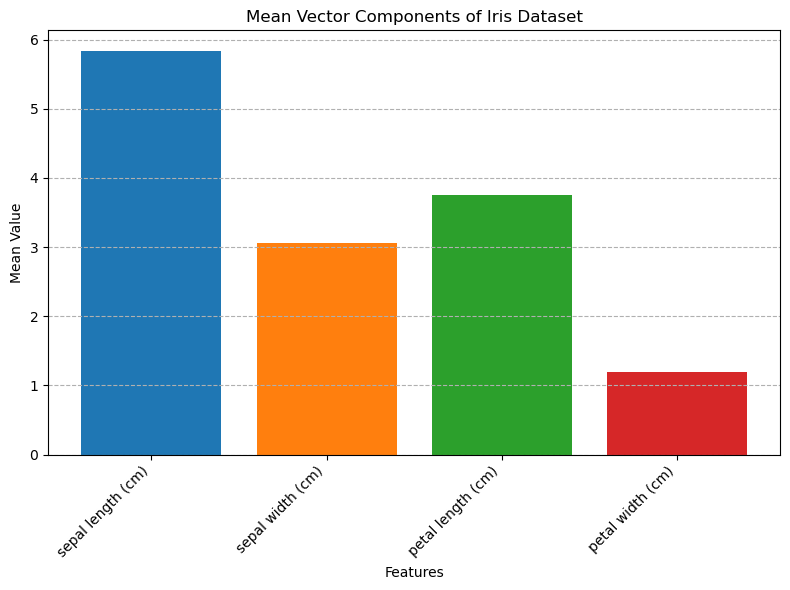

Bar Chart: Shows the average value for each feature. Helps in comparing the magnitudes of mean feature values directly.




In [3]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt  

# Load Iris dataset
iris = load_iris()
data_frame = pd.DataFrame(iris.data, columns=iris.feature_names)
print(data_frame)

# Calculate mean vector
mean_vector = data_frame.mean().values
print("Mean Vector (Overall):")
print(dict(zip(data_frame.columns, mean_vector)))
print("\n")

# Using matplotlib.pyplot module to represent the mean vector components as a bar graph 
plt.figure(figsize=(8, 6))
plt.bar(data_frame.columns, mean_vector, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Mean Vector Components of Iris Dataset')
plt.xlabel('Features') # Sepal length and width 
plt.ylabel('Mean Value') # Height of the bar graph representing size of the features
plt.xticks(rotation=45, ha="right") # Rotate and align to improve visual 
plt.grid(axis='y', linestyle='--')
plt.tight_layout() # Automatically adjusts the spacing between subplots
plt.show()

print("Bar Chart: Shows the average value for each feature. Helps in comparing the magnitudes of mean feature values directly.")
print("\n")



**Analysis**

5.	Interpret the mean vector in the context of the dataset and discuss its implications.

The bar chart is useful for directly comparing the average magnitudes of different features. For instance, you can easily see that the average petal length is larger than the average petal width. This mean vector represents a hypothetical "average" Iris flower across all samples in the dataset. It suggests that if you were to pick a flower at random from this combined collection and measure its characteristics, its dimensions would, on average, be close to these values. While it's a crucial statistical measure for many analytical procedures, its interpretation as a "typical Iris flower" should be tempered by the knowledge that the dataset comprises distinct species with differing characteristics. The true utility often lies in its role as a foundational calculation or when comparing it to species-specific means.

## Part 3: Performing Variance/Covariance Testing

**Introduction to Variance/Covariance Testing**

1.	Explain the importance of variance and covariance in multivariate analysis.

When dealing with multiple variables at once, variance and covariance are fundamental concepts needed to understand the data structure, guiding analytical techniques, and interpreting results. 

The variance is a measure for understanding individual variable spread. It quantifies the dispersion of data points for single variable around the its mean. A high variance indicates that data points are widely scattered, whereas a low variance suggests that data is more closely clustered around the mean. It's worth noting MANOVA (Multivariate Analysis of Variance) assumes homogeneity of variances across groups, so assessing variances is crucial for checking these assumptions. 

Covariance is measure for understanding relationships between variables. In other words, it measures the degree to which two variables change together. (Joint variability) A positive covariance indicates that as one variable increases, the other tends to increase as well. A negative covariance suggests that as one variable increases, the other tends to decrease. A covariance at or near zero indicates a weak or no linear relationship between the two variables. The magnitude of the covariance is an indicative of the strenghth, however, covariance is sensitive to the scale of the variables, making it difficult to compare relationships between different pairs of variables directly. This where correlation (The standardized version of covariance) becomes useful. 

In summary, covariance and variance provide the building blocks for understanding the individual behavior of variables and, more importantly, the intricate web of linear relationships among them in a multivariate dataset. Their combined representation in the variance-covariance matrix is a fundamental input for a wide array of power multivariate statistical methods, enabling insights into complex data. 




**Variance/Covariance Matrix**

2.	Define the variance/covariance matrix and its significance.
3.	Calculate the variance/covariance matrix for the Iris dataset using Python.
4.	Refer to the starter below. You are expected to expand it substantially.


In [5]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_iris

iris = load_iris()
data_frame = pd.DataFrame(iris.data, columns=iris.feature_names)

data_frame.info() # Gives summary and data types of non-null values
print("\n")

# Calculate covariance matrix
cov_matrix = np.cov(data_frame.T) # data_frame.T is the transpose operation swapping the rows and columns as needed for np.cov()
print("Covariance Matrix:\n", cov_matrix)
print("\nThe resulting cov_matrix (variance-covariance matrix) is a 4x4 square matrix where the element at cov_matrix[i,j] is the covariance between the ith feature and jth feature from the original data frame.")
print("The diagonal elements cov_matrix [i,i] represent the variance of the ith feature.\n")
print("For example, the value at cov_matrix[0,0] = 0.68569351 (along the main diagonal) gives the variance of the sepal length, while the value at cov_matrix[0,2] = 1.27431544 gives the covariance between sepal length and petal length.\nThe positive value indicates that as sepal length increases, petal length also tends to increase.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Covariance Matrix:
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]

The resulting cov_matrix (variance-covariance matrix) is a 4x4 square matrix where the element at cov_matrix[i,j] is the covariance between the ith feature and jth feature from the original data frame.
The diagonal elements cov_matrix [i,i] represent the variance of the ith feature.

For example, the value at cov_matrix[0,0] = 0.68569351 

**Hypothesis Testing**

5.	Design an experiment to test the hypothesis that two variables in the dataset are independent.
6.	Perform the hypothesis test using Python and interpret the results.
7.	Refer to the starter code below. You are expected to expand it substantially, including detailed comments.

In [7]:
from scipy.stats import chi2_contingency
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target # Adding species column

# Map species numbers to names for better readability
species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df['species_name'] = df['species'].map(species_map)

# Discretize 'petal width (cm)' into 3 bins
# Using qcut for quantile-based discretization (roughly equal number of samples in each bin)
df['petal width category'] = pd.qcut(df['petal width (cm)'], q=3, labels=['Small', 'Medium', 'Large'])

print("First 5 rows with new columns:")
print(df[['petal width (cm)', 'petal width category', 'species_name']].head())
print("\nValue counts for petal width categories:")
print(df['petal width category'].value_counts())
print("\nValue counts for species:")
print(df['species_name'].value_counts())


# Create the contingency table
# We are testing if 'petal width category' and 'species_name' are independent
contingency_table = pd.crosstab(df['petal width category'], df['species_name'])
print("\nContingency Table:")
print(contingency_table)

# Perform the Chi-squared test for independence
# H0: 'petal width category' and 'species_name' are independent
# H1: 'petal width category' and 'species_name' are dependent
chi2, p, dof, expected_frequencies = chi2_contingency(contingency_table)

print(f"\nChi2 statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected_frequencies, index=contingency_table.index, columns=contingency_table.columns).round(2))

# Significance level
alpha = 0.05

print(f"\nSignificance level (alpha): {alpha}")

if p < alpha:
    print("Result: Reject the null hypothesis ($H_0$).")
    print("Conclusion: Petal width category and Iris species are dependent.")
else:
    print("Result: Fail to reject the null hypothesis ($H_0$).")
    print("Conclusion: Petal width category and Iris species are independent.")


First 5 rows with new columns:
   petal width (cm) petal width category species_name
0               0.2                Small       Setosa
1               0.2                Small       Setosa
2               0.2                Small       Setosa
3               0.2                Small       Setosa
4               0.2                Small       Setosa

Value counts for petal width categories:
petal width category
Medium    52
Small     50
Large     48
Name: count, dtype: int64

Value counts for species:
species_name
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

Contingency Table:
species_name          Setosa  Versicolor  Virginica
petal width category                               
Small                     50           0          0
Medium                     0          48          4
Large                      0           2         46

Chi2 statistic: 266.3462
P-value: 0.0000
Degrees of freedom: 4

Expected Frequencies Table:
species_name          Setos

## Part 4: Interpreting Results Based on Multivariate Analysis

**Introduction to Result Interpretation**

1.	Explain the importance of interpreting the results of multivariate analysis.
  
Interpreting the results of multivariate analysis is crucial because it allows researchers and analysts to understand complex relationships among multiple variables simultaneously, leading to more informed decisions and accurate conclusions. Misinterpretation, on the other hand, can result in flawed insights, ineffective strategies, and potentially harmful outcome.

Real-world phenomena are rarely influenced by a single factor. Multivariate analysis acknowledges this complexity by examining the interaction of several variables and their influence on outcome. It can reveal correlations and dependencies between variables that wouldn't otherwise be apparent from analyzing them in isolation. In contrast, analyzing variables one at a time can sometimes lead to an incomplete or even incorrect understanding of the situation. Multivariate interpretation provides a more holistic and nuanced view.

By building robust models, we can understand which variables are significant predictors and how they relate to each other helps in developing a more reliable predictive model, thus enhancing predictive accuracy. Businesses can make more data-driven decisions, such as optimizing marketing campaigns by understanding how different customer segments respond to various messages across multiple channels.

In the era of Big Data, datasets often contain a vast number of variables. Reducing data dimensionality helps to focus insights. Simpliying complexity by using techniques such as Prinicple Component Analysis or Factor Analysis can reduce many variables to a smaller set of underlying components while retaining most of the important information. Interpretation allows researchers to understand what these condensed factors represent, making it easier to focus on the most influential aspects of the data.

Misinterpreting multivariate results can have significant consequences. For example, in health care, misinterpretation might result in incorrect diagnoses, ineffective treatment plans, or misleading public health recommendations. It is important to be careful with interpreting multivariate data to avoid costly errors.


**Case Study**

2.	Select a real-world dataset (e.g., Wine Quality dataset from UCI Machine Learning Repository).
3.	Perform a complete multivariate analysis: Calculate the mean vector, variance/covariance matrix, and conduct hypothesis tests.

Covariance Matrix:
                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.483859 -0.149028 -0.162192    0.031454  -0.008503  0.231222   
Medu       -0.149028  1.287208  0.808005   -0.225156   0.091294 -0.115907   
Fedu       -0.162192  0.808005  1.209848   -0.171520   0.045985 -0.108262   
traveltime  0.031454 -0.225156 -0.171520    0.560492  -0.039220  0.043405   
studytime  -0.008503  0.091294  0.045985   -0.039220   0.688086 -0.072555   
failures    0.231222 -0.115907 -0.108262    0.043405  -0.072555  0.351928   
famrel     -0.023935  0.026479  0.021293   -0.006812  -0.003272 -0.035518   
freetime   -0.006287 -0.023476  0.007909    0.000737  -0.060012  0.067963   
goout       0.161564  0.012721  0.035810    0.050574  -0.073579  0.031442   
Dalc        0.151827 -0.007364  0.000062    0.064270  -0.105549  0.058128   
Walc        0.135111 -0.028803  0.054312    0.054816  -0.228982  0.062682   
health     -0.015415  0.007571  0.071442   -0.052255  -0.

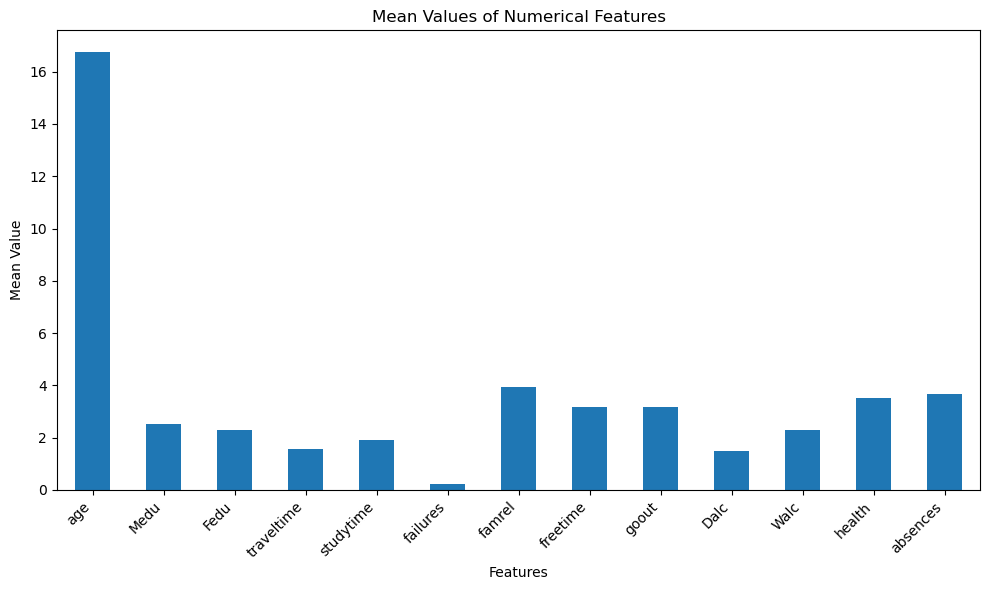



Conducting a One-Sample t-test for freetime scores...

Null Hypothesis (H0): The population mean of freetime scores is 5.0.
Alternative Hypothesis (Ha): The population mean of freetime scores is NOT 5.0.
Significance level (alpha): 0.05

Test Results for freetime:
Sample Mean for freetime: 3.1803
t-statistic: -44.1049
p-value: 0.0000

Decision:
Since the p-value (0.0000) is less than alpha (0.05), we reject the null hypothesis (H0).
There is statistically significant evidence that the population mean of freetime scores is different from 5.0.


Conducting Tests for Specific Elements of the Covariance Matrix...

Significance level (alpha) for these tests: 0.05

--- Test 1: Variance of 'age' ---
H0: Population variance of age = 1.5
Ha: Population variance of age != 1.5

Sample variance of age: 1.4839
Chi-squared statistic: 641.0272
Degrees of freedom: 648
p-value: 0.8604

Decision for variance test:
Since the p-value (0.8604) is not less than alpha (0.05), we fail to reject H0.
There is

In [15]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd 
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt 



# fetch dataset 
try:
    student_performance = fetch_ucirepo(id=320) 
    # data (as pandas dataframes) 
    X = student_performance.data.features 
    y = student_performance.data.targets 
except Exception as e: 
    print(f"Error fetching data: {e}")
    exit() # Exiting if fetch fails

# Selecting only columns that have numerical data
numerical_features = X.select_dtypes(include=['number']) 
n_samples = len(numerical_features)

mean_vector = numerical_features.mean()
# print("Mean vector:")
# print(mean_vector)

cov_matrix = numerical_features.cov()
print("Covariance Matrix:")
print(cov_matrix)

print("\nMean vector:")
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
mean_vector.plot(kind='bar')
plt.title('Mean Values of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('mean_vector_visualization.png') # Save the plot as an image
plt.show()


print("\n" + "="*50 + "\n")


# --- Conducting a Hypothesis Test ---
print("Conducting a One-Sample t-test for freetime scores...\n")

# 1. Define the feature and hypothesized population mean
feature_to_test = 'freetime'
hypothesized_mean_freetime = 5.0

# 2. State Hypotheses clearly
print(f"Null Hypothesis (H0): The population mean of {feature_to_test} scores is {hypothesized_mean_freetime}.")
print(f"Alternative Hypothesis (Ha): The population mean of {feature_to_test} scores is NOT {hypothesized_mean_freetime}.")

# 3. Set the significance level
alpha = 0.05
print(f"Significance level (alpha): {alpha}\n")

# 4. Perform the one-sample t-test

freetime_scores = numerical_features[feature_to_test] # This code gets the 'G1' column from the numerical_features DataFrame

# The scipy.stats.ttest_1samp function returns the t-statistic and the p-value
t_statistic, p_value = stats.ttest_1samp(a=freetime_scores, popmean=hypothesized_mean_G1)

print(f"Test Results for {feature_to_test}:")
print(f"Sample Mean for {feature_to_test}: {g1_scores.mean():.4f}")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}\n")

# 5. Make a decision
print("Decision:")
if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the null hypothesis (H0).")
    print(f"There is statistically significant evidence that the population mean of {feature_to_test} scores is different from {hypothesized_mean_G1}.")
else:
    print(f"Since the p-value ({p_value:.4f}) is not less than alpha ({alpha}), we fail to reject the null hypothesis (H0).")
    print(f"There is not statistically significant evidence that the population mean of {feature_to_test} scores is different from {hypothesized_mean_G1}.")

print("\n" + "="*50 + "\n") # Seperator

# --- Tests for Specific Elements of the Covariance Matrix ---
print("Conducting Tests for Specific Elements of the Covariance Matrix...\n")
alpha = 0.05
print(f"Significance level (alpha) for these tests: {alpha}\n")


# Test if the variance of 'age' (sigma_age^2) is equal to 1.5.
# H0: sigma_age^2 = 1.5
# Ha: sigma_age^2 != 1.5

feature_for_variance_test = 'age'
hypothesized_variance = 1.5
sample_variance_age = cov_matrix.loc[feature_for_variance_test, feature_for_variance_test]

print(f"--- Test 1: Variance of '{feature_for_variance_test}' ---")
print(f"H0: Population variance of {feature_for_variance_test} = {hypothesized_variance}")
print(f"Ha: Population variance of {feature_for_variance_test} != {hypothesized_variance}\n")
print(f"Sample variance of {feature_for_variance_test}: {sample_variance_age:.4f}")

# Test statistic for variance: (n-1)*s^2 / sigma_0^2 ~ chi2(n-1)
degrees_freedom_var = n_samples - 1
chi2_statistic_var = (degrees_freedom_var * sample_variance_age) / hypothesized_variance

# Calculate p-value for a two-tailed chi-squared test
# P(chi^2 < chi2_statistic_var)
cdf_value = stats.chi2.cdf(chi2_statistic_var, degrees_freedom_var)
if chi2_statistic_var > degrees_freedom_var: # if sample variance is larger than hypothesized
    p_value_var = 2 * (1 - cdf_value)
else: # if sample variance is smaller
    p_value_var = 2 * cdf_value
# Ensure p-value is not greater than 1 if chi2_statistic is far in one tail
p_value_var = min(p_value_var, 2 * (1 - min(cdf_value, 1-cdf_value)))


print(f"Chi-squared statistic: {chi2_statistic_var:.4f}")
print(f"Degrees of freedom: {degrees_freedom_var}")
print(f"p-value: {p_value_var:.4f}\n")

print("Decision for variance test:")
if p_value_var < alpha:
    print(f"Since the p-value ({p_value_var:.4f}) is less than alpha ({alpha}), we reject H0.")
    print(f"There is statistically significant evidence that the population variance of '{feature_for_variance_test}' is different from {hypothesized_variance}.")
else:
    print(f"Since the p-value ({p_value_var:.4f}) is not less than alpha ({alpha}), we fail to reject H0.")
    print(f"There is not statistically significant evidence that the population variance of '{feature_for_variance_test}' is different from {hypothesized_variance}.")
print("\n" + "-"*40 + "\n")



**Interpretation**

4.	Interpret the results of your analysis.
5.	Discuss how the insights gained from the analysis can inform decision-making and improve predictive models.

The analysis provides insights into the central tendencies, variability, and interrelationships of the numerical attributes of students, as well as tests specific hypotheses about 'freetime' and 'age'. This can help inform decision-making and improving predictive models which may be valuable for educational stakeholders. 

Understanding student characteristics by the mean vector, covariance matrix, and hypotheseses tests:

- If average 'studytime' is considered low, educators might consider strategies to encourage more study. 
- High average for 'abscences' could trigger investigations into underlying causes (e.g. health, motivation, transportation) and lead to intervention programs.
- The result of the 'freetime' t-test can inform discussions about student workload and well-being. If the mean 'freetime' is significantly lower than a desired benchmark (e.g., if 5.0 was a desired healthy level, and the test showed it's significantly less), it might indicate students are overscheduled or stressed.
- The test on 'age' variance indicates how diverse the student group is in terms of age. If the variance is significantly higher than expected, it might mean teaching strategies need to be adapted to cater to a wider range of age-related learning styles or life experiences. If lower, the group is more age-homogeneous.
- Understanding which factors are related can guide policy. If 'failures' and 'absences' have a high positive covariance, addressing absenteeism might also reduce failure rates.
- If 'freetime' and 'studytime' show a strong negative covariance, it highlights the trade-off students face, which could inform discussions about time management support.
- Insights into average student needs (e.g., low average grades in a subject, high average 'failures') can help allocate tutoring resources or support services more effectively.

The Python code performs several statistical analyses on the numerical features of the UCI Student Performance dataset. It calculates and visualizes the mean of these features, computes their covariance matrix, and conducts two specific hypothesis tests: a one-sample t-test on the 'freetime' feature and a chi-squared test for the variance of the 'age' feature. By systematically exploring the data as done in the provided code, we can gain a much richer understanding, leading to more informed decisions and robust, reliable predictive models. 

## Submission

1.	Submit your Jupyter Notebook file (.ipynb) with all the completed parts.
2.	Ensure your notebook includes detailed explanations, code comments, and visualizations.

## References
Any external sources or libraries used should be properly cited in your notebook.

Lesson 4: Multivariate Normal Distribution. (n.d.). Online.stat.psu.edu. https://online.stat.psu.edu/stat505/book/export/html/636

‌ReferenceEntities. (2023). Mathworks.com. https://www.mathworks.com/help//releases/R2021a/stats/multivariate-t-distribution-1.html?s_tid=CRUX_lftnav

‌Multivariate Distributions · Distributions.jl. (2025). Juliastats.org. https://juliastats.org/Distributions.jl/stable/multivariate/

Google. (2025). Gemini. Gemini.google.com; Google. https://gemini.google.com/app

Park, S., & Lim, J. (2022). An overview of heavy-tail extensions of multivariate Gaussian distribution and their relations. Journal of Applied Statistics, 49(13), 3477–3494. https://doi.org/10.1080/02664763.2022.2044018

(2025). Wishart Distribution. Mathworks.com. https://www.mathworks.com/help/stats/wishart-distribution.html

Cortez, P. (2008). Student Performance [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

Santos, G. (2024, March 24). 5 Useful Visualizations to Enhance Your Analysis | Towards Data Science. Towards Data Science. https://towardsdatascience.com/5-useful-visualizations-to-enhance-your-analysis-022a5dd67912/

‌
‌
